<a href="https://colab.research.google.com/github/genevieve01-hub/vehicle-monitoring/blob/main/copy_of_traffic_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Nov 30 20:28:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**setup** **and** **installation**

In [ ]:
!pip install ultralytics==8.3.19
!pip install supervision[assets]==0.24.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.6
    Uninstalling tqdm-4.66.6:
      Successfully uninstalled tqdm-4.66.6


**Downloading sample Video**

In [ ]:
from supervision.assets import download_assets, VideoAssets
# Download the sample video
SOURCE_VIDEO_PATH = download_assets(VideoAssets.VEHICLES)

  0%|          | 0/35345757 [00:00<?, ?it/s]

**Load Pre-trained YOLOv8 Model**

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8x.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:01<00:00, 133MB/s]


**Frame Processing and Object Detection**

In [ ]:

CLASS_NAMES_DICT = model.model.names
SELECTED_CLASS_NAMES = ['car', 'motorcycle', 'bus', 'truck']
SELECTED_CLASS_IDS = [
    {value: key for key, value in CLASS_NAMES_DICT.items()}[class_name]
    for class_name in SELECTED_CLASS_NAMES
    ]
from supervision.assets import download_assets, VideoAssets
import supervision as sv
SOURCE_VIDEO_PATH = download_assets(VideoAssets.VEHICLES)
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

vehicles.mp4 asset download complete. 



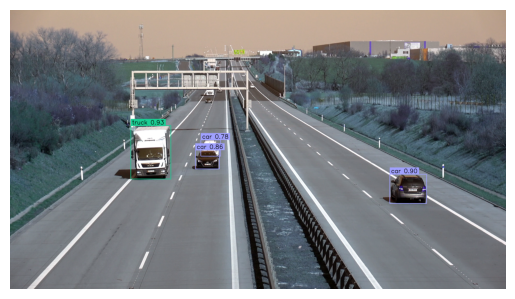

In [ ]:
# Create a frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# Get the first frame from the video
frame = next(generator)

# Predict and annotate the frame
results = model(frame, verbose=False)[0]  # Perform model prediction on the current frame
detections = sv.Detections.from_ultralytics(results)  # Convert prediction results to Detections

# Define labels
labels = [
    f"{model.model.names[class_id]} {confidence:0.2f}"  # Create labels for each detected object
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]

# Annotate the frame
annotated_frame = frame.copy()  # Create a copy of the frame to add annotations
annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections)
annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

# Display the annotated frame
import matplotlib.pyplot as plt

plt.imshow(annotated_frame)
plt.axis('off')
plt.show()

**Annotating the Frames**

In [ ]:

def callback(frame: np.ndarray, index: int) -> np.ndarray:
    results = model(frame, verbose=False)[0]  # Model prediction
    detections = sv.Detections.from_ultralytics(results)  # Convert results to detections

    # Filter detections based on selected classes
    detections = detections[np.isin(detections.class_id, SELECTED_CLASS_IDS)]

    # Generate labels for each detection
    labels = [
        f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
        for confidence, class_id in zip(detections.confidence, detections.class_id)
    ]

    # Annotate the frame with boxes and labels
    annotated_frame = frame.copy()
    annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections)
    annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

    return annotated_frame  # Return annotated frame

# Process entire video
TARGET_VIDEO_PATH = '/path/to/save/annotated_video.mp4'  # Output path

# Process the video
sv.process_video(
    source_path=SOURCE_VIDEO_PATH,  # Input video
    target_path=TARGET_VIDEO_PATH,  # Output video
    callback=callback               # Callback for processing each frame
)

**Processing the Entire Video**

In [ ]:
TARGET_VIDEO_PATH = '/content/annotated_video.mp4'

In [ ]:
TARGET_VIDEO_PATH = '/content/annotated_video.mp4'

In [ ]:
sv.process_video(
    source_path=SOURCE_VIDEO_PATH,
    target_path=TARGET_VIDEO_PATH,
    callback=callback
)

In [ ]:
import os
os.path.exists(TARGET_VIDEO_PATH)

True

In [ ]:
from google.colab import files
files.download(TARGET_VIDEO_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>